In [66]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from keras.preprocessing.image import ImageDataGenerator
plt.rcParams["figure.figsize"] = (20,3)

In [67]:
cd train_images/

/Users/sukeshperla/Desktop/Final Year Project/Data/aptos2019-blindness-detection/train_images


In [68]:
img = cv2.imread('000c1434d8d7.png')

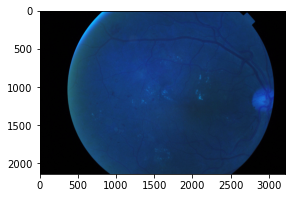

In [69]:
plt.imshow(img)

In [70]:
img.shape

(2136, 3216, 3)

In [71]:
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

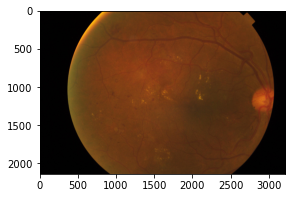

In [72]:
plt.imshow(img1)

In [73]:
cd ..

/Users/sukeshperla/Desktop/Final Year Project/Data/aptos2019-blindness-detection


In [94]:
#Loading the Dataset
Data = list()
for fn in listdir('train_images'):
    img = cv2.imread('train_images/'+fn)
    img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    Data.append(img1)

In [95]:
len(Data)

3662

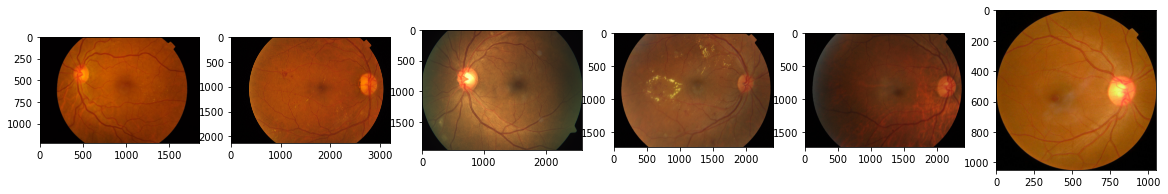

In [96]:
for i in range(1,7):
    plt.subplot(1,6,i)
    plt.imshow(Data[i])

In [97]:
#Resizing Images to be same shape
def resize(data):
    for i in range(1,len(data)):
        data[i] = cv2.resize(data[i],(480,480))
    return data

In [98]:
Data = resize(Data)

In [99]:
Data[i].shape

(480, 480, 3)

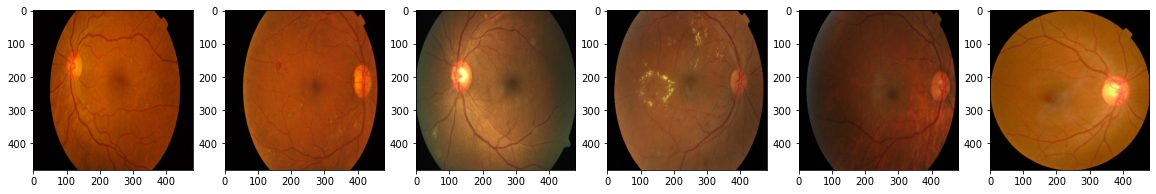

In [100]:
for i in range(1,7):
    plt.subplot(1,6,i)
    plt.imshow(Data[i])

In [107]:
#data augumentation
image_gen = ImageDataGenerator(rotation_range=360, # rotate the image 30 degrees
                               rescale=1/255, # Rescale the image by normalzing it.
                               brightness_range=[0.5, 1.5],
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True,
                               zca_whitening=True,
                               vertical_flip=True,# Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

/opt/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [102]:
#Augmentation
def Augment(data,image_gen):
    for i in range(1,len(data)):
        data[i] = image_gen.random_transform(data[i])
    return data

In [103]:
#Augmenting and Combining Images
aug_img = Augment(Data,image_gen)
for i in range(len(aug_img)):
    Data.append(aug_img[i])

In [104]:
len(Data)

7324

In [105]:
Data[-i].shape

(480, 480, 3)

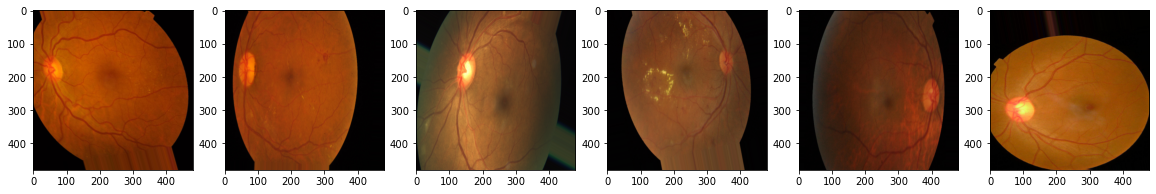

In [106]:
#Augmented Images
for i in range(1,7):
    plt.subplot(1,6,i)
    plt.imshow(Data[i])

In [108]:
len(Data)

7324

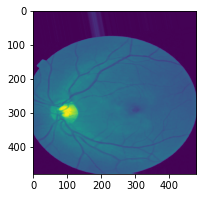

In [118]:
plt.imshow(Data[i][:,:,1])

In [119]:
for i in range(len(Data)):
    Data[i] = Data[i][:,:,1]

In [120]:
len(Data)

7324

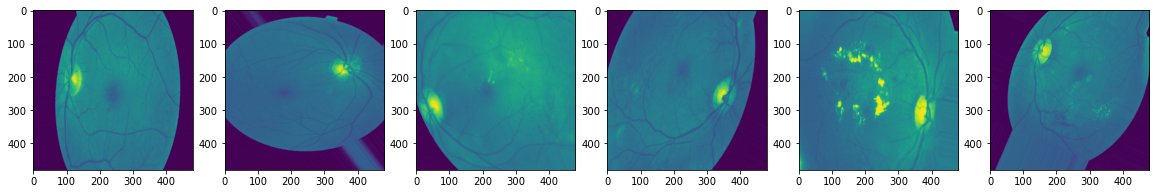

In [122]:
for i in range(1,7):
    plt.subplot(1,6,i)
    plt.imshow(Data[-i])

In [127]:
# The declaration of CLAHE  
# clipLimit -> Threshold for contrast limiting 
clahe = cv2.createCLAHE(clipLimit = 5) 
final_img = clahe.apply(Data[0]) + 30

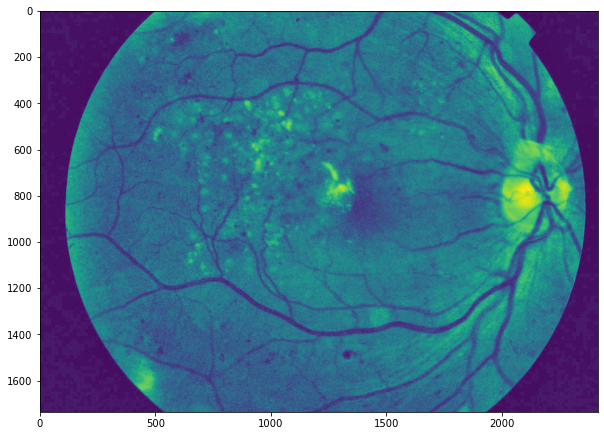

In [129]:
plt.figure(figsize=(10,10))
plt.imshow(final_img)

In [130]:
final_img.shape

(1736, 2416)